# Análises sem outliers

Pedro Neto

In [8]:
require("ggplot2")
library(dplyr)
library(data.table)

setwd('/home/pasoneto/Documents/github/eye_tracking_ufabc/Luisiana')

data = fread("treated.csv")
#data = dplyr::filter(data, data$outliers == 0)
unique(filter(data, data$dominio == "comportamento adaptativo")$subteste)

[1] "autodirecao"          "lazer"                "saude e seguranca"   
 [4] "vida domestica"       "autocuidado"          "vida em comunidade"  
 [7] "funcao pre-academica" "motora"               "social"              
[10] "comunicacao"

# Verificando Idade

Idade no pré e no pós

In [3]:
plyr::ddply(data, c('condicao'), summarise,
                   idade = mean(idade_ano, na.rm = TRUE),
                   sd   = sd(idade_ano, na.rm = TRUE))

condicao,idade,sd
<chr>,<dbl>,<dbl>
pos,1.491034,0.1931073
pre,1.285181,0.1866507


# Verificando N

In [69]:
length(unique(data$crianca)) #mesmo número de criançar cortadas.
#Ninguem foi cortado mais de uma vez

[1] 22

# Verificando presença

Porcentagem de presença geral

In [70]:
mean(data$presenca_pct)
min(data$presenca_pct)
max(data$presenca_pct)

[1] 0.7992052

[1] 0.5

[1] 1

# Para colocar no Sample

Deixar claras as suas variáveis dependentes e independentes. Isso entra no design do estudo. Meu texto asusme que esses fatores tenham sido explicados previamente.

Inserir na seção de sample: 
A nossa amostra foi composta por 22 participantes voluntários, com idade média de $1.28 \pm 0.18$ no pré-teste e de $1.49 \pm 0.19$ no pós teste. 

# Análises descritivas

Como primeiro passo da análise de dados, nós computamos uma série de estatísticas descritivas sobre os escores obtidos antes e depois da intervenção musical (i.e., pré e pós). Esses escores foram computados em dois níveis distintos de especificidade: 1) por domínio e 2) por subdomínio. Uma esquematização de cada um desses níveis está disponível na figura X.  Essas estatísticas foram computadas como forma de visualizar possíveis efeitos da intervenção musical nos escores obtidos pelos participantes.  

%%results
Os resultados das estatísticas descritivas indicam, a nível de domínio da escala Bailey, que houve um aumento nos escores do pós teste foram para as capacidades cognitiva e motora (Figura X+1). Conforme representado na Figura X+2, no entanto, a melhora na capacidade motora se deve ao aumento da performance no subdomínio de motricidade grossa.

Conforme representado na figura X+3a e x+3b, não houve uma diferença aparente entre os escores pré e pós intervenção a nível de questionário (i.e., socioeconômico e de comportamento adaptativo), nem a nível dos subdomínios do questionário de comportamento adaptativo (Figura x+4).
%%results

Além de avaliar possíveis efeitos de intervenção nos escores obtidos pelos participantes, nós investigamos possíveis influências de variáveis entre-sujeitos que não foram explicitamente controladas no nosso design experimental. Especificamente, foram avaliadas possíveis interferências de idade e de presença sobre o efeito de intervenção musical. 

Para este fim, nós computamos 1) a média entre as idades no pré e no pós teste de cada participante; 2) o percentual de presença de cada criança; e 3) a diferença entre os escore no pós e no pré teste para cada participante (i.e., $\Delta e$). Com essas variáveis, nós pudemos avaliar a correlação entre $\Delta e$ e idade dos participantes, bem como entre $\Delta e$ e percentuais de presença.

%%result
A níve de domínio da escala Bailey, nós identificamos uma tendencia de correlação positiva [r(20) = 0.23, p = 0.29] entre a frequencia do participante e a diferença obtida entre os escores pré e pós teste (Figura X+5). Nós também identificamos uma correlação positiva entre $\Delta e$ e a idade dos participantes [r(20) = 0.43, p < 0.05] (figura x+6).

%%result

Por fim, nós realizamos uma análise de outliers, na qual foram computadas amplitudes interquartílicas (i.e. Inter Quantile Range - IQR) a nível de questionário (i.e., Socioemocional e de Comportamento adaptativo), e a nível de domínio (i.e., Bailey - Linguagem, Motor e Cognitivo). Foram considerados outliers aqueles que obtiveram notas $1.5$IQR acima ou abaixo do primeiro ou do terceiro quartil, respectivamente.
Nós identificamos ______. 

Como a exclusão dos outliers não ocasionou nenhuma mudança aparente nos resultados das nossas estatísticas descritivas, nós optamos por não excluílos das análises iniciais. Todos os resultados reportados na seção seguinte foram computados, portanto, com inclusão dos outliers identificados.

In [5]:
#Outliers nivel de domínio

#table(data$outlier, data$dominio)
table(data$crianca, data$outlier)
unique(data$subteste)

                                        
                                          0  1  2
  Anelise Klein Vasconcelos Dias         32  0  0
  Anne Longhi Germano                    32  0  0
  Asafe Paschon Cordeiro                 29  3  0
  Ayla Prates Duarte de Souza            32  0  0
  Clarisse Hernann Pereira               32  0  0
  Eduardo M S. Barguena                  30  1  1
  Emanuela Rodrigues Santos              32  0  0
  Gabriela Barbara Gomes Fonseca         32  0  0
  Gabriela Teixeira Felix                32  0  0
  Guilherme Visebeli de Carvalho         31  0  1
  Heitor Melo Castro                     32  0  0
  Ingrid L. F Bessa                      31  0  1
  Jo\xe3o Paulo Magalh\xe3es Rodrigues   32  0  0
  L\xedvia Barros Berdnikoff             32  0  0
  Lucas Soares Teixeira                  31  0  1
  Manuela Gon\xe7alves Leles             31  0  1
  Maria Luisa Sousa da Costa             32  0  0
  Pedro Pita Figueiredo                  31  0  1
  Rafael 

[1] "cognitivo"              "autodirecao"            "lazer"                 
 [4] "saude e seguranca"      "vida domestica"         "autocuidado"           
 [7] "vida em comunidade"     "funcao pre-academica"   "motora"                
[10] "social"                 "comunicacao"            "comunicacao receptiva" 
[13] "comunicacao expressiva" "grossa"                 "fina"                  
[16] "socioemocional"

# Verificando efeitos

Efeito de tratamento na Bailey

testes,condicao,geral,mean,sd,se
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
cognitivo,pos,bailey,12.63636,3.200379,0.6823230
cognitivo,pre,bailey,11.11765,1.218726,0.2955846
linguagem,pos,bailey,10.11364,3.629440,0.5471586
linguagem,pre,bailey,10.18182,3.465932,0.5225089
motora,pos,bailey,10.86364,2.698759,0.4068532
motora,pre,bailey,10.00000,2.641138,0.4075364


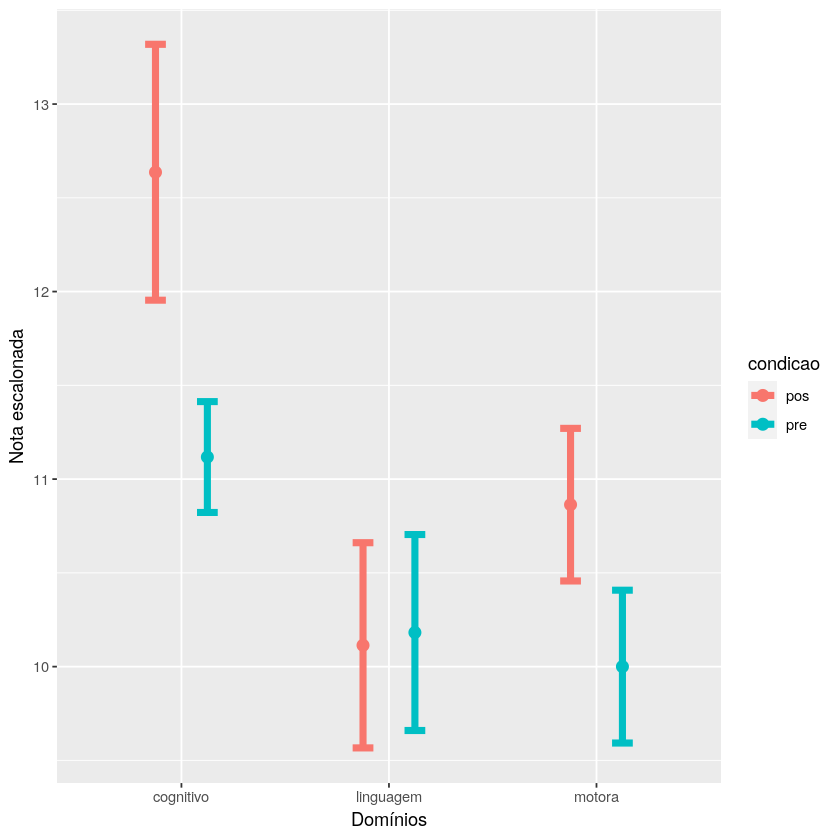

In [18]:
#x+1
data = fread("treated.csv")
data = dplyr::filter(data, data$outliers == 0)

dt = data.frame(score    = data$nota_esc.x,
                testes   = data$dominio,  
                crianca  = data$crianca,
                condicao = data$condicao,
                geral    = data$teste)

base <- plyr::ddply(dt, c('testes', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

dplyr::filter(base, base$geral == 'bailey')
ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")

Efeito de tratamento no questionário 1

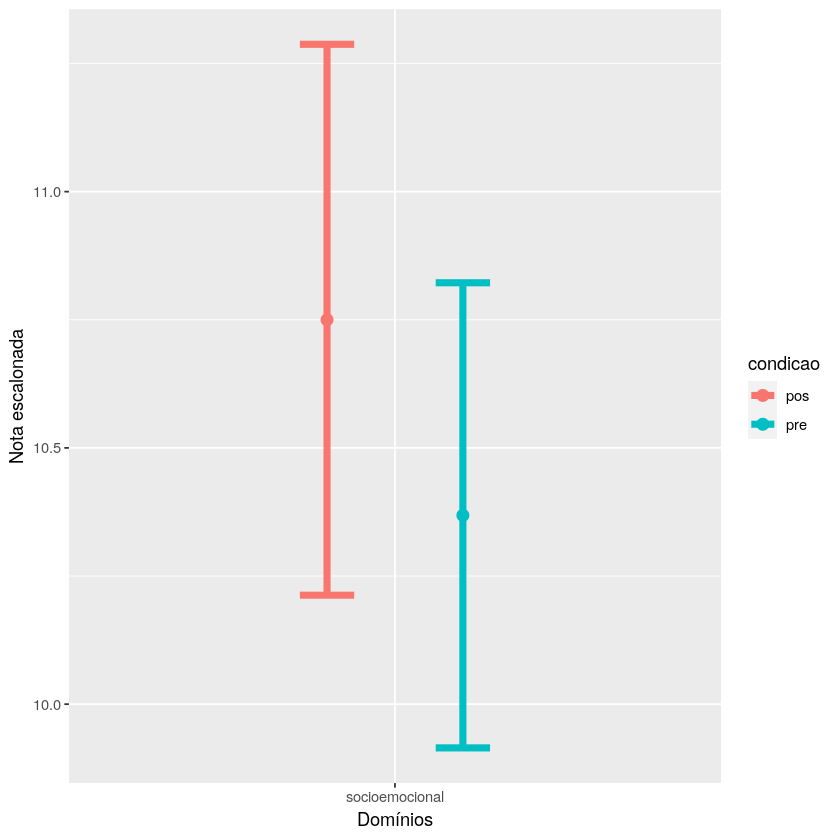

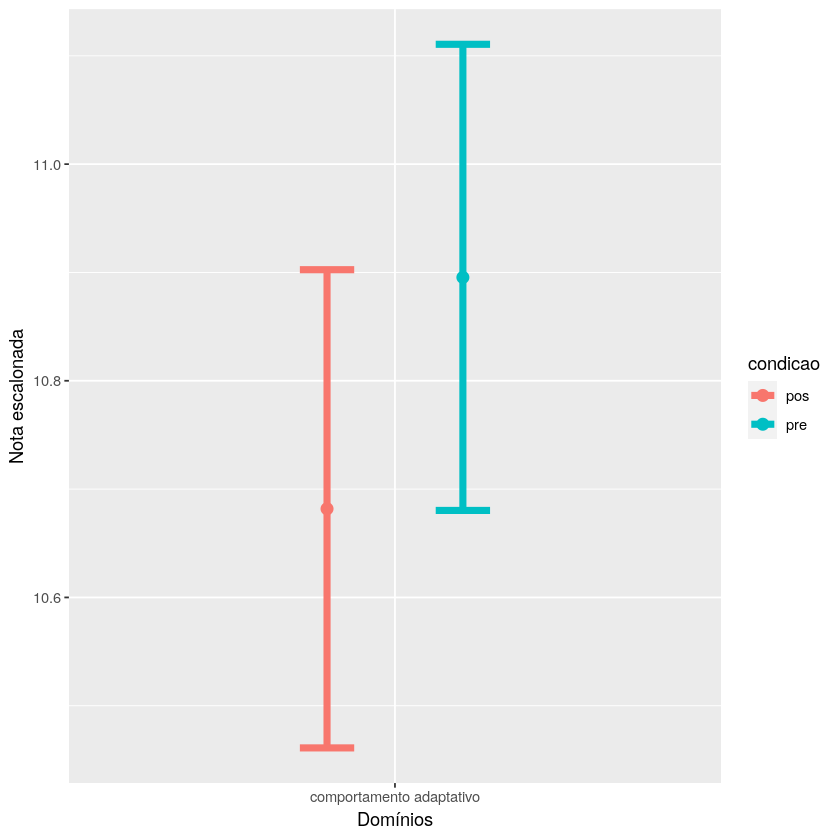

In [19]:
#x+3a e x+3b
ggplot(dplyr::filter(base, base$geral == 'questionario1'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")

ggplot(dplyr::filter(base, base$geral == 'questionario2'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")

# Subdomínios

Verificando subdomínio para cada teste global (Bailey, Questionário 1 e Questionário 2)

## Bailey

Bailey por domínio

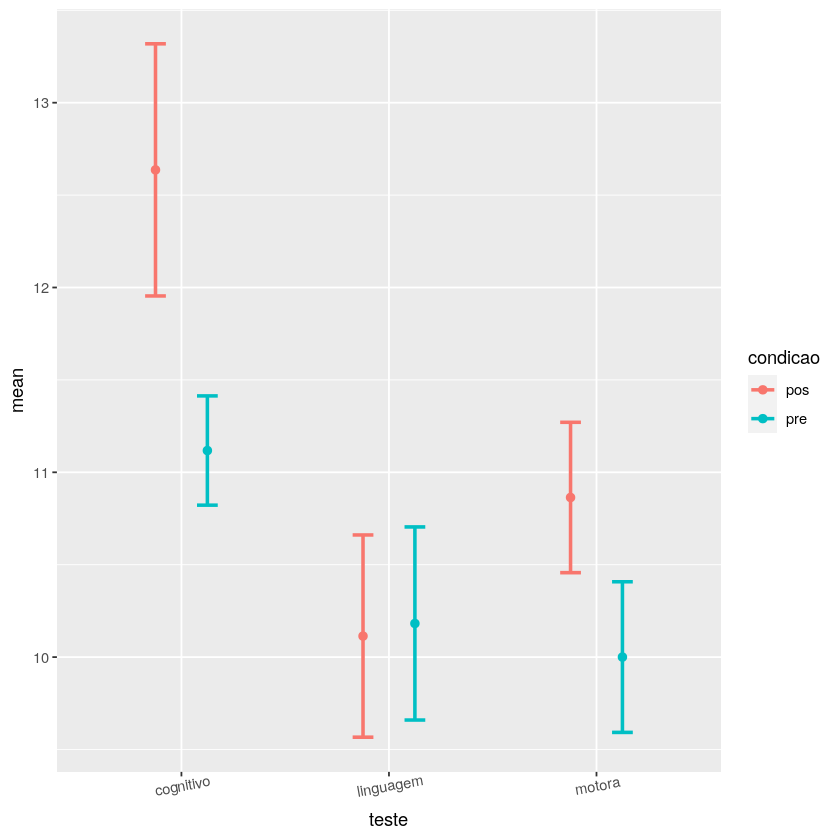

In [81]:
rm(list=ls()) #cleans directory

dt = fread("treated.csv")
dt = dplyr::filter(dt, dt$outliers == 0)

dt = data.frame(score = dt$nota_esc.x,
                teste = dt$dominio,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste
               )

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score))
                    )

ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 10))

## Bailey
Bailey por subdomínio

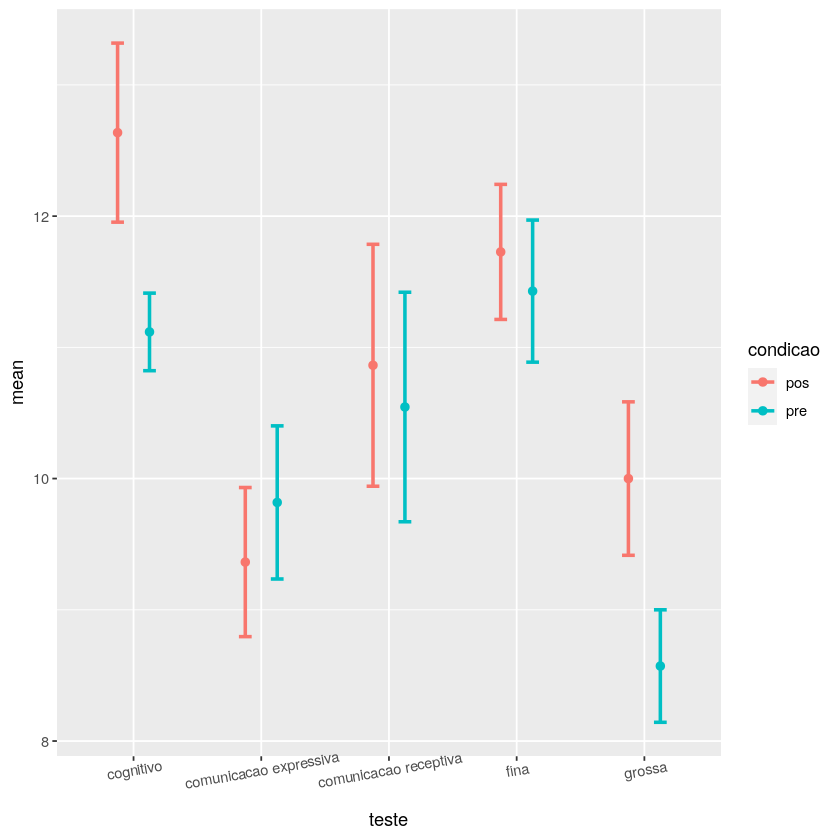

In [94]:
#x+2
rm(list=ls()) #cleans directory

dt = fread("treated.csv")
dt = dplyr::filter(dt, dt$outliers == 0)


dt = data.frame(score = dt$nota_esc.x,
                teste = dt$subteste,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste
               )

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score))
                    )

ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 10))



## Questionário 1

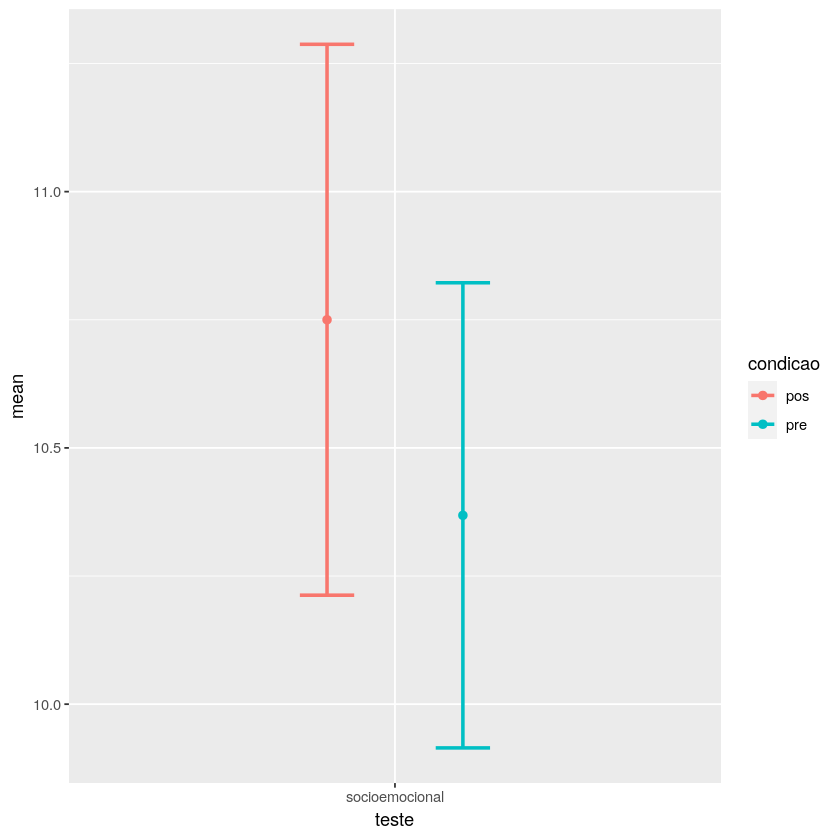

In [95]:
ggplot(dplyr::filter(base, base$geral == 'questionario1'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), width = 0.2, position = position_dodge(width = 0.5))

## Questionário 2

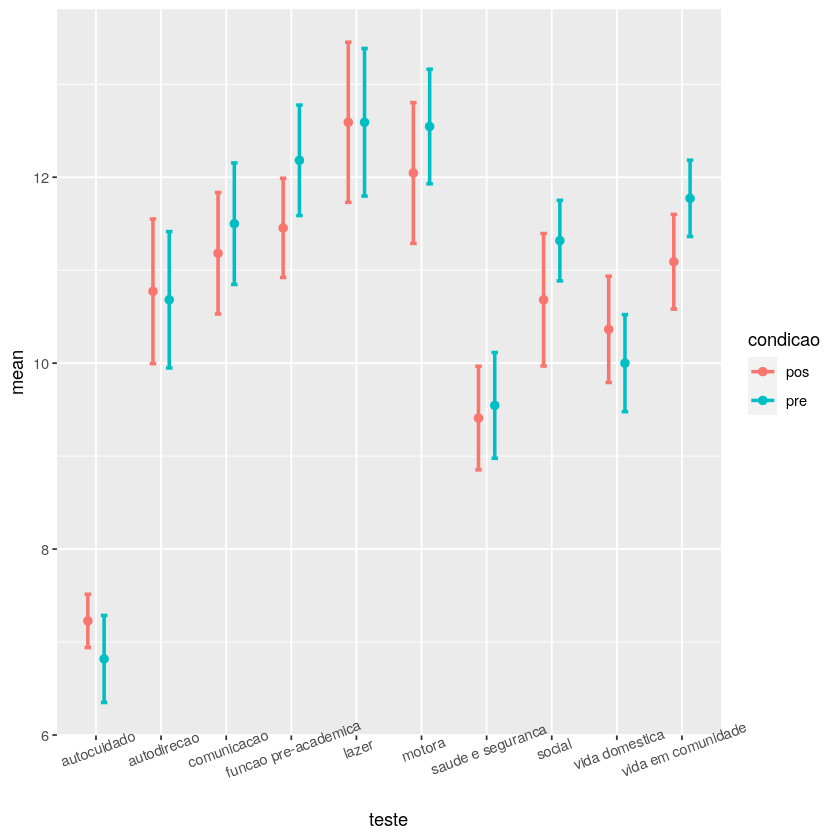

In [96]:
#x+4
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$outlier == 0)

dt = data.frame(score = dt$nota_esc.x,
                teste = dt$subteste,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste)

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

ggplot(dplyr::filter(base, base$geral == 'questionario2'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 20))

# Efeito de presença

Overall

`geom_smooth()` using formula 'y ~ x'



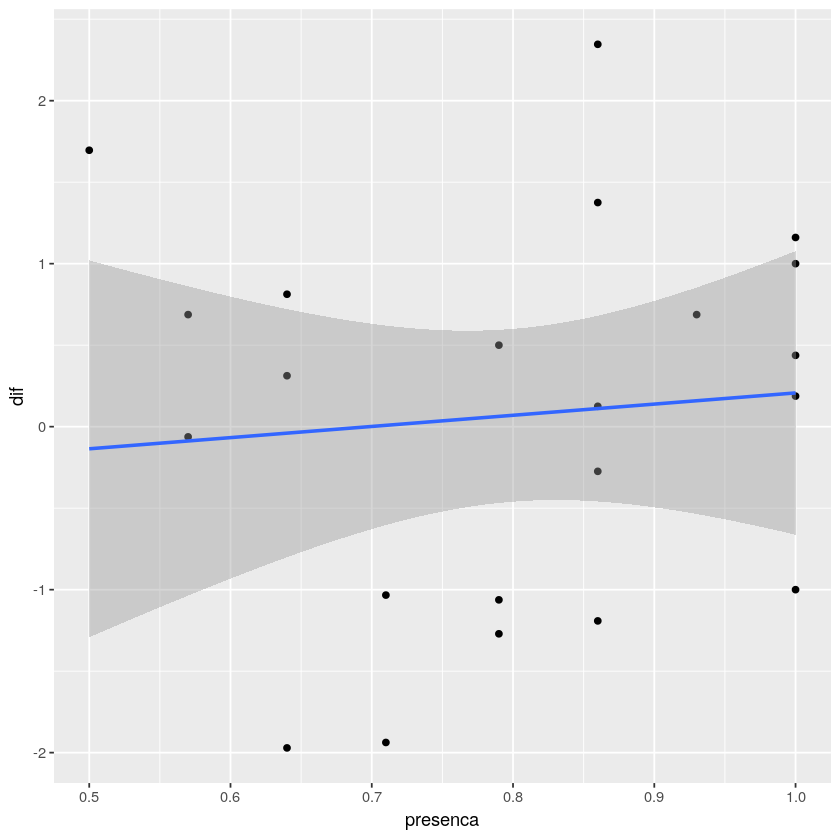

In [14]:
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$outlier == 0)

base <- plyr::ddply(dt, c("crianca", "condicao"), summarise,
                    presenca = mean(presenca_pct, na.rm = TRUE),
                    score    = mean(nota_esc.x, na.rm = TRUE))

base = tidyr::spread(base, condicao, score)
base$dif = base$pos-base$pre

ggplot(base, aes(x = presenca, y = dif))+
    geom_point()+
    geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  um and dois
t = 1.0796, df = 20, p-value = 0.2932
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2074796  0.5971829
sample estimates:
      cor 
0.2346553 


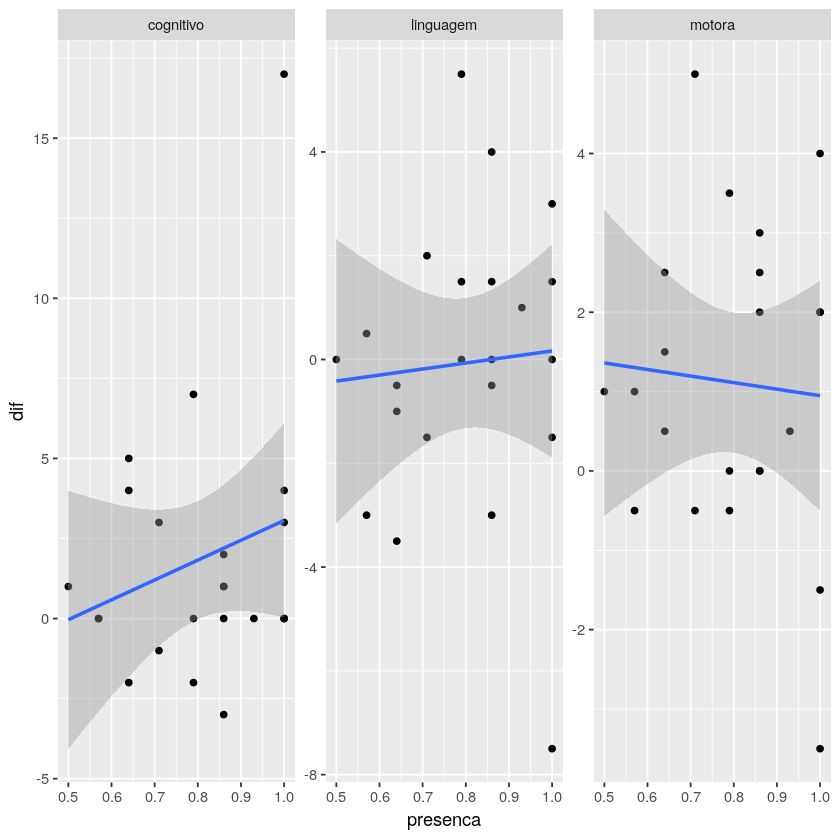

In [15]:
#Figura x+5
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
dt = filter(dt, dt$teste == "bailey")

base <- plyr::ddply(dt, c("crianca", "condicao", "dominio"), summarise,
                    presenca = mean(presenca_pct, na.rm = TRUE),
                    score    = mean(nota_esc.x, na.rm = TRUE))

base = tidyr::spread(base, condicao, score, convert = FALSE)
base$dif = base$pos-base$pre

ggplot(base, aes(x = presenca, y = dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm')

um = dplyr::filter(base, base$dominio == "cognitivo")$presenca
dois = dplyr::filter(base, base$dominio == "cognitivo")$dif
cor.test(um, dois)


`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  um and dois
t = 1.913, df = 42, p-value = 0.06258
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01503278  0.53502274
sample estimates:
      cor 
0.2831111 


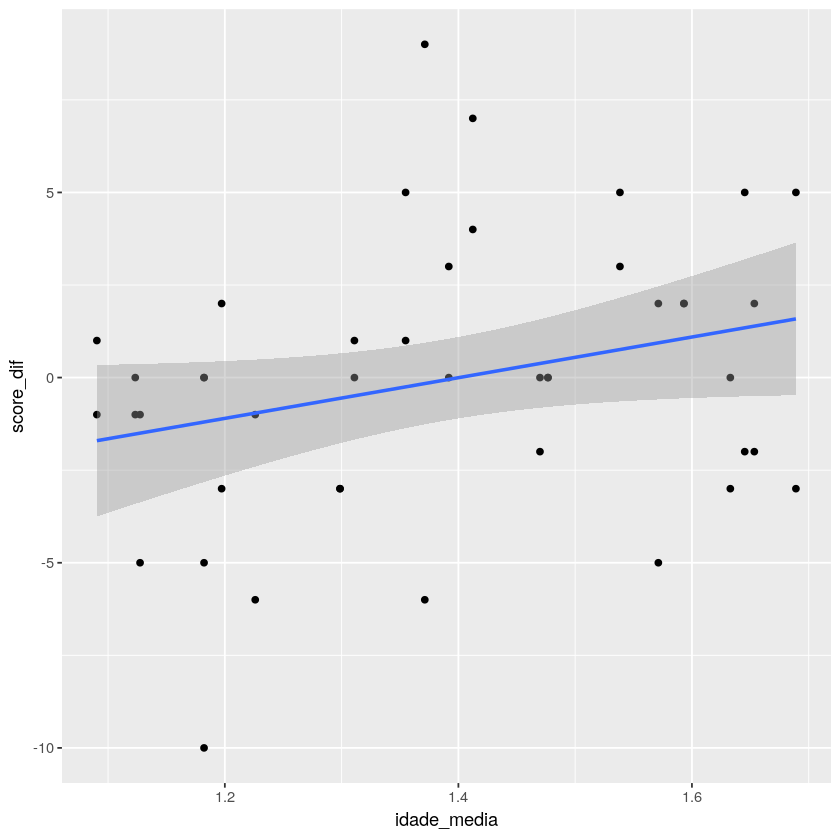

In [16]:
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
#dt = dplyr::filter(dt, dt$outlier == 0)

base = data.frame(crianca = dt$crianca,
                  condicao = dt$condicao,
                  score_pre = dt$nota_esc.x,
                  dominio = dt$dominio,
                  idade_pre = dt$idade_ano)

pre = dplyr::filter(base, base$condicao == "pre")
pos = dplyr::filter(base, base$condicao == "pos")

pre$idade_pos = pos$idade
pre$score_pos = pos$score

pre$idade_media = (pre$idade_pos + pre$idade_pre)/2
pre$score_dif = pre$score_pos - pre$score_pre

base = pre

# dt %>%
#    group_by(crianca, condicao, dominio) %>%
#    summarise(idade = mean(idade_ano), score = mean(nota_esc.x))

ggplot(dplyr::filter(base, base$dominio == "linguagem"), aes(x = idade_media, y = score_dif))+
#    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm')

um = dplyr::filter(base, base$dominio == "linguagem")$idade_media
dois = dplyr::filter(base, base$dominio == "linguagem")$score_dif
cor.test(um, dois)

# Linguagem subgrupo

Efeito de idade nos subgrupos de linguagem da bailey

[1] "V1"           "crianca"      "dominio"      "condicao"     "subteste"    
 [6] "nota Bruta"   "nota_esc.x"   "data_teste"   "nascimento"   "idade"       
[11] "presenca"     "oficinas"     "presenca_pct" "teste"        "av1_pre"     
[16] "av2_pre"      "av1_pos"      "idade_ano"    "nota_esc.y"   "outliers"

`geom_smooth()` using formula 'y ~ x'




	Pearson's product-moment correlation

data:  um and dois
t = 2.1699, df = 20, p-value = 0.04223
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01829439 0.72475512
sample estimates:
      cor 
0.4365358 


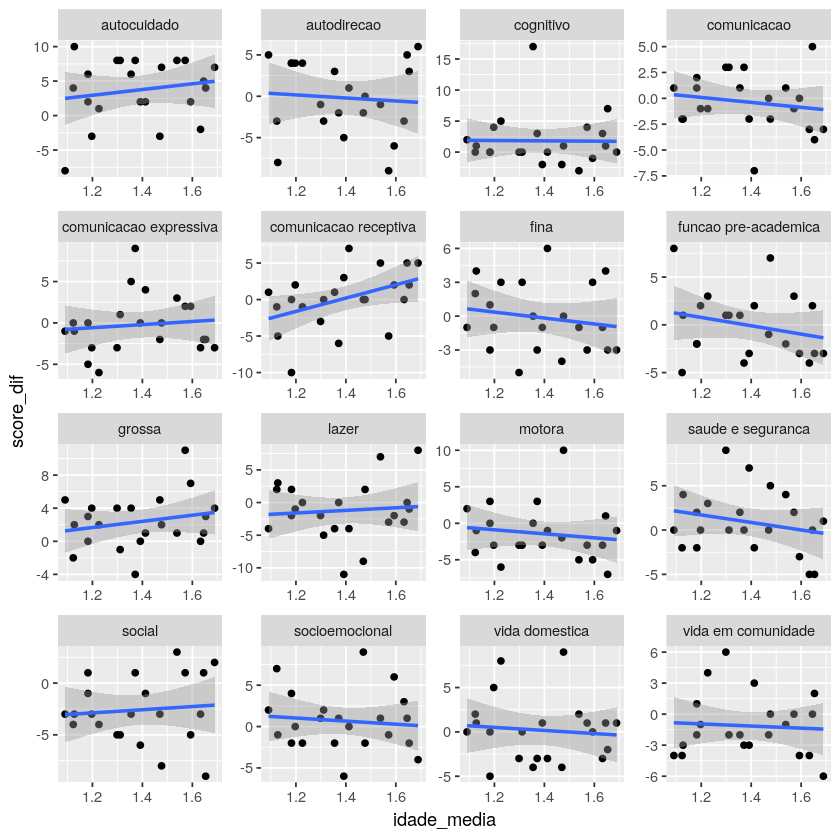

In [16]:
#x+6
rm(list=ls()) #cleans directory

dt = fread('treated.csv', header = T, encoding = 'UTF-8')
#dt = dplyr::filter(dt, dt$outlier == 0)

colnames(dt)

base = data.frame(crianca = dt$crianca,
                  condicao = dt$condicao,
                  score_pre = dt$nota_esc.x,
                  dominio = dt$subteste,
                  idade_pre = dt$idade_ano)

pre = dplyr::filter(base, base$condicao == "pre")
pos = dplyr::filter(base, base$condicao == "pos")

pre$idade_pos = pos$idade
pre$score_pos = pos$score

pre$idade_media = (pre$idade_pos + pre$idade_pre)/2
pre$score_dif = pre$score_pos - pre$score_pre

base = pre

# dt %>%
#    group_by(crianca, condicao, dominio) %>%
#    summarise(idade = mean(idade_ano), score = mean(nota_esc.x))

ggplot(base, aes(x = idade_media, y = score_dif))+
    facet_wrap(~dominio, scale = 'free')+
    geom_point()+
    geom_smooth(method = 'lm')

um = dplyr::filter(base, base$dominio == "comunicacao receptiva")$idade_media
dois = dplyr::filter(base, base$dominio == "comunicacao receptiva")$score_dif
cor.test(um, dois)

#Comunicação receptiva - detalhar